# **6 - Analyze & Interpret A/B Testing Results**

Experimental Design and A/B Testing



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats import proportion

# <font color='blue'>Review: Analyze & Interpret A/B Testing Results </font>
    ---

## **Key Steps for Running an A/B Test**
* Develop a set of *hypotheses* to test
* Define your key evaluation criteria
* Define your statistics requirements
* Run your experiment
* Evaluate your results

User can interpret the results through simple experimentation dashboard.

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_1.png" width=600>

Figure above explain
- Number of sample size, i.e. `sessions`
- Key evaluation criteria, i.e. `conversion` and `conversion rate`.
- Practical significance, i.e. `lift over baseline` or `relative lift over baseline`
- Statistical significane, i.e. `p-value`

Here are another example

<img src = "https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_2.png">

Figure above explain
- Number of sample size, i.e. `users`
- Key evaluation criteria, i.e. `purchase` and `purchase / user`
- Practical significance, i.e. `uplift`
- Statistical significance (in terms of Bayesian probability -- posterior distribution), i.e. `Porbability to Be Best`

## **A more thorough analysis**

- Basic analysis --> practical & statistical significance
- Secondary metric analysis --> save you from making a mistake, lead to interesting insights
- Audience breakdown analysis --> find the optimum "winning" variation by analyzing per category.

---
- *The challenger did not perform well*

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_3.png" width=800>



---
- *Analyzing per user devices, we get 'the winner'*

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_4.png" width=800>
<br>
<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_5.png" width=800>
<br>
<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_6.png" width=800>


## **Data Processing**

We have to process the data before analyze it.
* Sort & group the data, by user ID & timestamp
* Clean the suspicious data
* Enrich the data

# <font color='blue'>Case: E-commerce Testing</font>
---

- An e-commerce perform online experimentation to grow their business.
- They want to **increase** the user conversion rate.
- Thus, they create landing page variant by changing the "Buy Me" button.
    - **Hypothesis - 0**: Old landing page.
    - **Hypothesis - 1**: New landing page
- They use **conversion rate** as their key evaluation criteria.
- They run the test but they **do not have A/B test** dashboard at the moment.
- Help them to create simple & reliable dashboard for their analysis.


## 1. Load the Data
---

- After running the experimentation, you'll have 2 files:
  - `ab_data.csv`
  - `countries.csv`

In [2]:
# Function to read the streamed experimentation files
def load_csv(filename):
    """
    Function to read the streamed experimentation files
    :param filename: <str> file location
    :return data: <pandas DataFrame> data
    """
    data = pd.read_csv(filename)

    return data



In [3]:
# Read ab_data
ab_data = load_csv(filename = "ab_data.csv")

print(f"Total session: {ab_data.shape[0]}")
ab_data.head(10)

Total session: 294478


,user_id,timestamp,group,landing_page,converted,devices
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,Desktop
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,Mobile
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,Desktop
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,Desktop
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,Desktop
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,Desktop
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,0,Desktop
7,719014,2017-01-17 01:48:29.539573,control,old_page,1,Mobile
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,0,Mobile
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,0,Desktop


In [5]:
# Read ab_data
country_data = load_csv(filename = "countries.csv")

print(f"Total entry: {country_data.shape[0]}")
country_data.head(10)

Total entry: 290584


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
5,909908,UK
6,811617,US
7,938122,US
8,887018,US
9,820683,US


## 2. Merge the Data
---

summarize_data(data = clean_data[clean_data["country"] == "CA"])

In [6]:
def merge_data(data, data_to_merge, on_column):
    """
    Function to merge 2 pandas dataframe on a column using outer method
    :param data: <pandas DataFrame> host data
    :param data_to_merge: <pandas DataFrame> data to be merged with host data
    :param on_column: <str> merging column reference
    :return merged_data: <pandas DataFrame> merged data
    """
    merged_data = data.merge(data_to_merge,
                             on = on_column,
                             how = "outer")

    return merged_data


In [7]:
# Merge data
merged_data = merge_data(data = ab_data,
                         data_to_merge = country_data,
                         on_column = "user_id")

print(f"Total session: {merged_data.shape[0]}")
merged_data.head(10)

Total session: 294478


,user_id,timestamp,group,landing_page,converted,devices,country
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0,Desktop,US
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1,Mobile,US
2,630002,2017-01-19 19:20:56.438330,control,old_page,0,Desktop,US
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0,Desktop,US
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0,Desktop,US
5,630005,2017-01-17 21:22:25.940766,treatment,new_page,0,Desktop,US
6,630006,2017-01-14 05:13:51.962356,treatment,new_page,1,Desktop,US
7,630008,2017-01-11 16:11:11.131461,control,old_page,1,Desktop,US
8,630009,2017-01-05 23:35:15.820565,control,old_page,0,Mobile,US
9,630010,2017-01-06 16:36:05.678507,treatment,new_page,0,Desktop,UK


- Congratulations! We have merge the data
- The total sessions are still 294,478 sessions.
- There will be some NaN value on `country`, but we can clean it later.

## 3. Clean the Data
---

Some tasks:
* Remove invalid data, i.e. *`control` with `new_page`* or *`treatment` with `old_page`*
* Remove duplicate data
* Handle the `NaN` data

#### 3.1. Remove Invalid Data
---

In [8]:
# Check if there is any control with new page or treatment with old page
condition_1 = (merged_data["group"] == "control") \
                & (merged_data["landing_page"] == "new_page")
condition_2 = (merged_data["group"] == "treatment") \
                & (merged_data["landing_page"] == "old_page")

# Display the data
merged_data[condition_1 | condition_2]

,user_id,timestamp,group,landing_page,converted,devices,country
43,630052,2017-01-07 12:25:54.089486,treatment,old_page,0,Desktop,US
112,630126,2017-01-14 13:35:54.778695,treatment,old_page,0,Mobile,US
124,630137,2017-01-22 14:59:22.051308,control,new_page,0,Desktop,US
285,630320,2017-01-12 05:27:37.181803,treatment,old_page,1,Mobile,US
424,630471,2017-01-07 02:14:17.405726,control,new_page,1,Mobile,US
...,...,...,...,...,...,...,...
294133,945627,2017-01-06 00:03:20.474879,control,new_page,0,Desktop,US
294149,945645,2017-01-20 03:09:21.251778,control,new_page,1,Desktop,US
294207,945703,2017-01-08 19:40:51.169351,control,new_page,0,Mobile,US
294291,945797,2017-01-11 03:04:49.433736,control,new_page,0,Mobile,UK


In [9]:
def remove_invalid(data):
    """
    Function to remove invalid data, i.e.
    - control group with new landing page
    - treatment group with old landing page
    :param data: <pandas DataFrame> sample data
    :return clean_data: <pandas DataFrame> cleaned sample data
    """
    clean_data = data.copy()

    # Find the invalid
    condition_1 = (data["group"] == "control") & (data["landing_page"] == "new_page")
    condition_2 = (data["group"] == "treatment") & (data["landing_page"] == "old_page")

    # Filter the invalid
    clean_data = clean_data[~(condition_1 | condition_2)]

    return clean_data


In [10]:
merged_data = remove_invalid(data = merged_data)

print(f"Total session: {merged_data.shape[0]}")
merged_data.head(10)

Total session: 290585


,user_id,timestamp,group,landing_page,converted,devices,country
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0,Desktop,US
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1,Mobile,US
2,630002,2017-01-19 19:20:56.438330,control,old_page,0,Desktop,US
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0,Desktop,US
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0,Desktop,US
5,630005,2017-01-17 21:22:25.940766,treatment,new_page,0,Desktop,US
6,630006,2017-01-14 05:13:51.962356,treatment,new_page,1,Desktop,US
7,630008,2017-01-11 16:11:11.131461,control,old_page,1,Desktop,US
8,630009,2017-01-05 23:35:15.820565,control,old_page,0,Mobile,US
9,630010,2017-01-06 16:36:05.678507,treatment,new_page,0,Desktop,UK


In [11]:
# Check if there is any control with new page or treatment with old page
condition_1 = (merged_data["group"] == "control") \
                & (merged_data["landing_page"] == "new_page")
condition_2 = (merged_data["group"] == "treatment") \
                & (merged_data["landing_page"] == "old_page")

# Display the data
merged_data[condition_1 | condition_2]

,user_id,timestamp,group,landing_page,converted,devices,country


- **Nice!** Now all the data is valid
- We can move to the next process.

#### 3.2. Remove Duplicate Data
---

- Find the duplicate data, especially on `user_id` or `timestamp`
- It has to be unique.

In [12]:
# Find the duplicate
merged_data[merged_data["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted,devices,country
133526,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,Mobile,US


In [13]:
merged_data[merged_data["user_id"] == 773192]

,user_id,timestamp,group,landing_page,converted,devices,country
133525,773192,2017-01-09 05:37:58.781806,treatment,new_page,1,Mobile,US
133526,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,Mobile,US


In [14]:
def remove_duplicates(data):
    """
    Function to remove duplicates from data user_id.
    This function will drop all the data from the problematic user_id.
    :param data: <pandas DataFrame> sample data
    :return clean_data: <pandas DataFrame> cleaned sample data
    """
    clean_data = data.copy()

    clean_data = clean_data.drop_duplicates(subset = ["user_id"],
                                            keep = False)

    return clean_data


In [16]:
merged_data = remove_duplicates(data = merged_data)

print(f"Total session: {merged_data.shape[0]}")
merged_data.head(10)

Total session: 290583


,user_id,timestamp,group,landing_page,converted,devices,country
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0,Desktop,US
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1,Mobile,US
2,630002,2017-01-19 19:20:56.438330,control,old_page,0,Desktop,US
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0,Desktop,US
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0,Desktop,US
5,630005,2017-01-17 21:22:25.940766,treatment,new_page,0,Desktop,US
6,630006,2017-01-14 05:13:51.962356,treatment,new_page,1,Desktop,US
7,630008,2017-01-11 16:11:11.131461,control,old_page,1,Desktop,US
8,630009,2017-01-05 23:35:15.820565,control,old_page,0,Mobile,US
9,630010,2017-01-06 16:36:05.678507,treatment,new_page,0,Desktop,UK


In [15]:
# Find the duplicate
merged_data[merged_data["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted,devices,country
133526,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,Mobile,US


#### 3.3. Handle the NaN Data
---

In [17]:
for col in merged_data.columns:
    print(merged_data[col].value_counts(dropna = False))
    print("")

user_id
945999    1
630000    1
630001    1
630002    1
630003    1
         ..
630013    1
630011    1
630010    1
630009    1
630008    1
Name: count, Length: 290583, dtype: int64

timestamp
2017-01-16 04:56:21.132067    1
2017-01-19 06:26:06.548941    1
2017-01-16 03:16:42.560309    1
2017-01-19 19:20:56.438330    1
2017-01-12 10:09:31.510471    1
                             ..
2017-01-13 04:28:26.422941    1
2017-01-24 09:27:13.046891    1
2017-01-06 16:36:05.678507    1
2017-01-05 23:35:15.820565    1
2017-01-11 16:11:11.131461    1
Name: count, Length: 290583, dtype: int64

group
treatment    145309
control      145274
Name: count, dtype: int64

landing_page
new_page    145309
old_page    145274
Name: count, dtype: int64

converted
0    211263
1     79320
Name: count, dtype: int64

devices
Desktop    174351
Mobile     101788
Tablet      14444
Name: count, dtype: int64

country
US    203618
UK     72466
CA     14499
Name: count, dtype: int64



In [18]:
def remove_nan(data, columns):
    """
    Function to remove NaN data
    - replacing NaN with "UNKNOWN"
    :param data: <pandas DataFrame> sample data
    :param columns: <str> columns to handle
    :return clean_data: <pandas DataFrame> clean data
    """
    clean_data = data.copy()

    clean_data[columns] = clean_data[columns].fillna("UNKNOWN")

    return clean_data

In [19]:
merged_data = remove_nan(data = merged_data,
                         columns = "country")

In [20]:
for col in merged_data.columns:
    print(merged_data[col].value_counts(dropna = False))
    print("")

user_id
945999    1
630000    1
630001    1
630002    1
630003    1
         ..
630013    1
630011    1
630010    1
630009    1
630008    1
Name: count, Length: 290583, dtype: int64

timestamp
2017-01-16 04:56:21.132067    1
2017-01-19 06:26:06.548941    1
2017-01-16 03:16:42.560309    1
2017-01-19 19:20:56.438330    1
2017-01-12 10:09:31.510471    1
                             ..
2017-01-13 04:28:26.422941    1
2017-01-24 09:27:13.046891    1
2017-01-06 16:36:05.678507    1
2017-01-05 23:35:15.820565    1
2017-01-11 16:11:11.131461    1
Name: count, Length: 290583, dtype: int64

group
treatment    145309
control      145274
Name: count, dtype: int64

landing_page
new_page    145309
old_page    145274
Name: count, dtype: int64

converted
0    211263
1     79320
Name: count, dtype: int64

devices
Desktop    174351
Mobile     101788
Tablet      14444
Name: count, dtype: int64

country
US    203618
UK     72466
CA     14499
Name: count, dtype: int64



## 4. Enrich the Data
---

- We notice that the `timestamp` format is too complex
- Let's simplify this to only return `yyyy-mm-dd` and convert it to datetime type.

In [21]:
def convert_to_date(data, columns):
    """
    Function to convert data to datetime type according to specific format.
    The format: yyyy-mm-dd
    :param data: <pandas DataFrame> sample data
    :param columns: <str> data column to convert
    :param clean_data: <pandas DataFrame> sample data clean
    """
    clean_data = data.copy()

    # extract data
    clean_data[columns] = clean_data[columns].apply(lambda i: i.split(" ")[0])
    clean_data[columns] = pd.to_datetime(clean_data[columns])

    return clean_data


In [22]:
merged_data = convert_to_date(data = merged_data,
                              columns = "timestamp")

In [23]:
merged_data["timestamp"]

,timestamp
0,2017-01-19
1,2017-01-16
2,2017-01-19
3,2017-01-12
4,2017-01-18
...,...
294473,2017-01-03
294474,2017-01-09
294475,2017-01-04
294476,2017-01-16


In [24]:
print(f"Total session: {merged_data.shape[0]}")
merged_data.head(10)

Total session: 290583


,user_id,timestamp,group,landing_page,converted,devices,country
0,630000,2017-01-19,treatment,new_page,0,Desktop,US
1,630001,2017-01-16,treatment,new_page,1,Mobile,US
2,630002,2017-01-19,control,old_page,0,Desktop,US
3,630003,2017-01-12,treatment,new_page,0,Desktop,US
4,630004,2017-01-18,treatment,new_page,0,Desktop,US
5,630005,2017-01-17,treatment,new_page,0,Desktop,US
6,630006,2017-01-14,treatment,new_page,1,Desktop,US
7,630008,2017-01-11,control,old_page,1,Desktop,US
8,630009,2017-01-05,control,old_page,0,Mobile,US
9,630010,2017-01-06,treatment,new_page,0,Desktop,UK


## <font color='blue'>5. Combine Steps 1-4</font>
---

In [25]:
def process_data(filename):
    """
    Function to process the data
    :param filename: <list> list of files
    :return clean_data: <pandas DataFrame> clean data
    """
    # 1. Extract ab_data.csv & country.csv
    ab_data = load_csv(filename = filename[0])
    country_data = load_csv(filename = filename[1])

    # 2. Merge data
    merged_data = merge_data(data = ab_data,
                             data_to_merge = country_data,
                             on_column = "user_id")

    # 3. Clean data
    merged_data = remove_invalid(data = merged_data)
    merged_data = remove_duplicates(data = merged_data)
    merged_data = remove_nan(data = merged_data,
                             columns = "country")

    # 4. Enrich data
    merged_data = convert_to_date(data = merged_data,
                                  columns = "timestamp")

    clean_data = merged_data.copy()

    return clean_data


In [26]:
clean_data = process_data(filename = ["ab_data.csv",
                                      "countries.csv"])

In [27]:
print(f"Total session: {clean_data.shape[0]}")
clean_data.head(10)

Total session: 290583


,user_id,timestamp,group,landing_page,converted,devices,country
0,630000,2017-01-19,treatment,new_page,0,Desktop,US
1,630001,2017-01-16,treatment,new_page,1,Mobile,US
2,630002,2017-01-19,control,old_page,0,Desktop,US
3,630003,2017-01-12,treatment,new_page,0,Desktop,US
4,630004,2017-01-18,treatment,new_page,0,Desktop,US
5,630005,2017-01-17,treatment,new_page,0,Desktop,US
6,630006,2017-01-14,treatment,new_page,1,Desktop,US
7,630008,2017-01-11,control,old_page,1,Desktop,US
8,630009,2017-01-05,control,old_page,0,Mobile,US
9,630010,2017-01-06,treatment,new_page,0,Desktop,UK


## <font color='blue'>6. Create Basic Dashboard</font>
---

**From a given dataframe**, we want to build

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_7.png" width=600>

What we are going to do:
* Split the data to variant A (control) and B (treatment)
* Calculate the number of session, conversion, & conversion rate
* Calculate the lift over baseline
* Calculate the p-value
* Calculate the probability to be best
* Summarize all of them into a single dataframe

It is **not** that hard! Let's do it!

#### 6.1. Split the data to variant A & B
---

In [28]:
def split_data(data):
    """
    Function to split data into variant control & treatment
    :param data: <pandas DataFrame> sample data
    :return control_df: <pandas DataFrame> data control
    :return treatment_df: <pandas DataFrame> data treatment
    """
    data = data.copy()

    control_df = data[data["group"] == "control"]
    treatment_df = data[data["group"] == "treatment"]

    return control_df, treatment_df


In [29]:
# Split the data
control_df, treatment_df = split_data(data = clean_data)

In [30]:
control_df.head(10)

,user_id,timestamp,group,landing_page,converted,devices,country
2,630002,2017-01-19,control,old_page,0,Desktop,US
7,630008,2017-01-11,control,old_page,1,Desktop,US
8,630009,2017-01-05,control,old_page,0,Mobile,US
10,630011,2017-01-24,control,old_page,0,Mobile,US
11,630013,2017-01-13,control,old_page,0,Desktop,UK
12,630015,2017-01-07,control,old_page,0,Mobile,US
16,630019,2017-01-10,control,old_page,0,Desktop,UK
17,630020,2017-01-15,control,old_page,1,Desktop,US
20,630025,2017-01-18,control,old_page,0,Desktop,US
23,630029,2017-01-20,control,old_page,0,Mobile,US


In [31]:
treatment_df.head(10)

,user_id,timestamp,group,landing_page,converted,devices,country
0,630000,2017-01-19,treatment,new_page,0,Desktop,US
1,630001,2017-01-16,treatment,new_page,1,Mobile,US
3,630003,2017-01-12,treatment,new_page,0,Desktop,US
4,630004,2017-01-18,treatment,new_page,0,Desktop,US
5,630005,2017-01-17,treatment,new_page,0,Desktop,US
6,630006,2017-01-14,treatment,new_page,1,Desktop,US
9,630010,2017-01-06,treatment,new_page,0,Desktop,UK
13,630016,2017-01-16,treatment,new_page,0,Mobile,US
14,630017,2017-01-13,treatment,new_page,0,Desktop,US
15,630018,2017-01-10,treatment,new_page,0,Desktop,US


#### 6.2. Calculate key evaluation criterion
---

In [32]:
def extract_evaluation(data):
    """
    Extract key evaluation criterion within the data
    - number of session
    - number of conversion
    - conversion rate
    :param data: <pandas DataFrame> sample data
    :return results: <dict> contain number of sess., number of conv., & conversion rate
    """
    # Number of session
    n_session = int(data.shape[0])

    # Number of conversion
    n_conversion = int(data["converted"].sum())

    # Conversion rate (in percent)
    conversion_rate = (n_conversion/n_session) * 100

    # Return results
    results = {}
    results["session"] = n_session
    results["conversion"] = n_conversion
    results["CVR"] = np.round(conversion_rate, 2)

    return results


In [33]:
control_res = extract_evaluation(data = control_df)
treatment_res = extract_evaluation(data = treatment_df)

In [34]:
print(f"CONTROL: {control_res}")
print(f"TREATMENT: {treatment_res}")

CONTROL: {'session': 145274, 'conversion': 39865, 'CVR': np.float64(27.44)}
TREATMENT: {'session': 145309, 'conversion': 39455, 'CVR': np.float64(27.15)}


#### 6.3. Calculate lift-over-baseline
---

$$
\text{Lift} = CVR_{\text{treatment}} - CVR_{\text{control}}
$$

lift = treatment_res["CVR"] - control_res["CVR"]
lift

#### 6.4. Calculate the p-value
---

In [35]:
def calculate_pval(control_res, treatment_res):
    """
    Calculate the p-value from two-sided hypothesis test
    :param control_res: <dict> control group summary
    :param treatment_res: <dict> treatment group summary
    :return pval: <float> p-value
    """
    # Group results
    counts = [control_res["conversion"], treatment_res["conversion"]]
    obs = [control_res["session"], treatment_res["session"]]

    _, pval = proportion.proportions_ztest(count = counts,
                                           nobs = obs,
                                           alternative = "two-sided")

    return pval


In [36]:
pval = calculate_pval(control_res = control_res,
                      treatment_res = treatment_res)

pval

np.float64(0.08061857982064582)

**Remember** the rule of thumbs

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_8.png" width=600>


- Thus, we can conclude that there is little evidence (or even lesser) to prove the effect of the treatment.

#### 6.5. Calculate the Probability to Be Best (PBB)
---

- To get sense of chance of a variation to have the best performance in the long term, we simulate its probability distribution given **the current** data
- **Bayesian** approach it is!

- Simply, we use the Bayesian theorem to find our update believe (posterior) about something that we know (prior) given the data (likelihood).

$$
P(\mu | z) \propto P(\mu) P(z|\mu)
$$

- $P(\mu)$ is the prior probability to find our current conversion rate ($\mu$).
- Because it is `convert` or `not convert`, the probability must be following the binomial distribution.
- Thus,

$$
P(\mu) \sim \text{Binomial}(\mu, n_{\text{trial}}, n_{\text{success}})
$$

- $P(z|\mu)$ is the likelihood.
- Why we need this? Because, even the CRV is similar, however it is different between:
  - 1 conversion from 10 users
  - 12 conversions from 100 users
  - 70 conversions from 500 users

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_9.png" width=800>

- We can model the above distribution using **Beta** distribution.
- Why? because beta distribution return value between 0-1.

$$
P(z|\mu) \sim \text{Beta}(\alpha, \beta)
$$

- Multiply both the prior and likelihood to obtain the posterior.
- In short, we get the posterior distribution as

$$
P(\mu|z) \sim \text{Beta}(\alpha=n_{\text{success}}+1, \beta=n_{\text{fail}}+1)
$$

In [37]:
# Create a function to find the posterior distribution
def generate_posterior(results):
    """
    Function to generate the posterior distribution from a group result
    posterior distribution
        P(CVR | z) ~ Beta(a = n_success + 1,
                          b = n_fail + 1)
    :param results: <dict> summary of evaluation criteria
    :return posterior: <list> simulation of posterior distribution
    """
    # Ekstrak value
    n_trial = results["session"]
    n_success = results["conversion"]
    n_fail = n_trial - n_success

    # Generate posterior
    posterior = stats.beta.rvs(a = 1 + n_success,
                               b = 1 + (n_trial-n_success),
                               size = 10_000)

    return posterior


In [38]:
# Generate posterior results of control & treatment
control_posterior = generate_posterior(results = control_res)
treatment_posterior = generate_posterior(results = treatment_res)

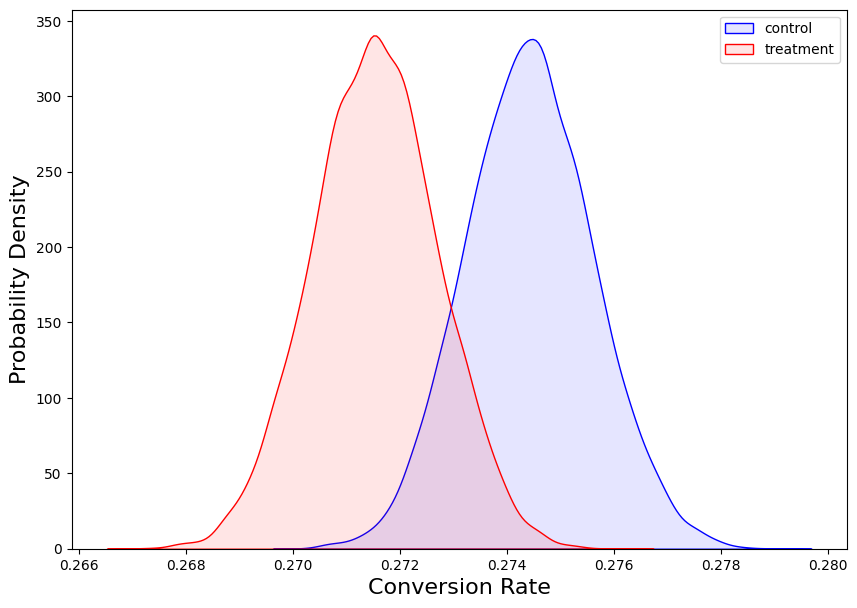

In [39]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_posterior,
            color = "blue",
            label = "control",
            fill = True,
            alpha = 0.1,
            ax = ax)
sns.kdeplot(data = treatment_posterior,
            color = "red",
            label = "treatment",
            fill = True,
            alpha = 0.1,
            ax = ax)

ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate", fontsize=16)
plt.legend()
plt.show()

In [40]:
control_win = control_posterior - treatment_posterior

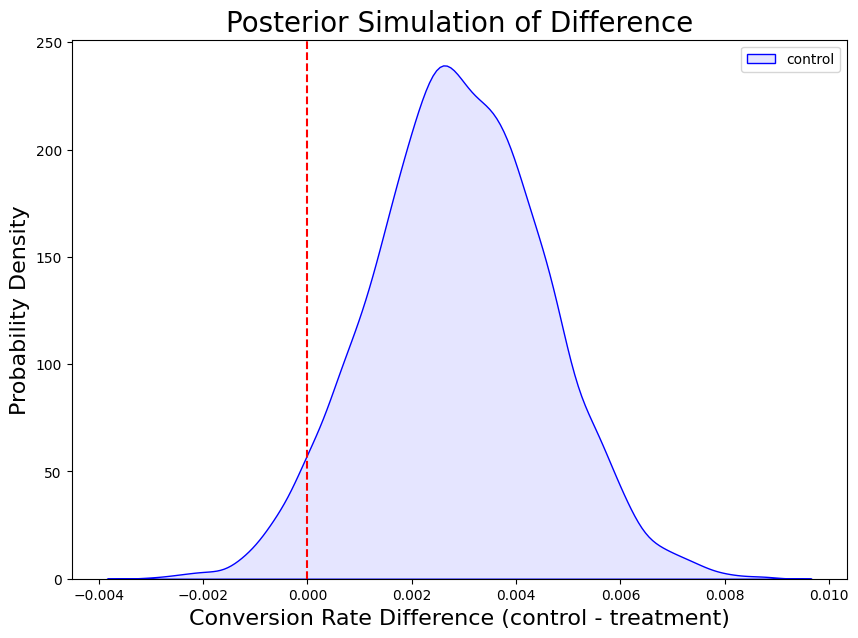

In [41]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_win,
            color = "blue",
            label = "control",
            fill = True,
            alpha = 0.1,
            ax = ax)
ax.axvline(0.0000, color = "red", linestyle="--")

ax.set_title("Posterior Simulation of Difference", fontsize=20)
ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Conversion Rate Difference (control - treatment)", fontsize=16)
plt.legend()
plt.show()

In [42]:
# calculate probability to be best (pbb) - in percent
control_pbb = (control_win > 0.0).mean() * 100
control_pbb

np.float64(95.86)

In [43]:
# pbb treatment
treatment_pbb = 100 - control_pbb
treatment_pbb

np.float64(4.140000000000001)

In [44]:
def calculate_pbb(control_res, treatment_res):
    """
    Function to calculate probability to be best
    :param control_res: <dict> results from control group
    :param treatment_res: <dict> results from treatment group
    :return control_res: <dict> updated results for control group
    :return treatment_res: <dict> updated results for treatment group
    """
    # 1. Generate the posterior distribution
    control_posterior = generate_posterior(results = control_res)
    treatment_posterior = generate_posterior(results = treatment_res)

    # 2. Calculate the winner of control group
    control_win = control_posterior - treatment_posterior

    # 3. Calculate the probability to be best
    control_pbb = (control_win > 0.0).mean() * 100
    treatment_pbb = 100 - control_pbb

    # 4. Add results to control_res & treatment_res
    control_res["PBB"] = control_pbb
    treatment_res["PBB"] = treatment_pbb

    return control_res, treatment_res


In [45]:
control_res, treatment_res = calculate_pbb(control_res = control_res,
                                           treatment_res = treatment_res)

print(f"CONTROL: {control_res}")
print(f"TREATMENT: {treatment_res}")

CONTROL: {'session': 145274, 'conversion': 39865, 'CVR': np.float64(27.44), 'PBB': np.float64(96.28999999999999)}
TREATMENT: {'session': 145309, 'conversion': 39455, 'CVR': np.float64(27.15), 'PBB': np.float64(3.710000000000008)}


#### <font color='blue'>6.6. Summarize all to a dataframe<font>
---

We want to create something like this

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-ab-testing/notebook_12_pict_10.png" width=600>

In [46]:
def summarize_data(data):
    """
    Function to create experimentation summary
    :param data: <pandas DataFrame> sample data
    :return summary_data: <pandas DataFrame> summary data
    """
    # 1. Split the data
    control_df, treatment_df = split_data(data = data)

    # 2. Calculate evaluation criterion
    control_res = extract_evaluation(data = control_df)
    treatment_res = extract_evaluation(data = treatment_df)

    # 3. Calculate lift over baseline (uplift) -- absolute in percent
    lift = treatment_res["CVR"] - control_res["CVR"]
    control_res["lift"] = "---"
    treatment_res["lift"] = np.round(lift, 2)

    # 4. Calculate the p-value
    pval = calculate_pval(control_res = control_res,
                          treatment_res = treatment_res)
    control_res["p-value"] = "---"
    treatment_res["p-value"] = np.round(pval, 2)

    # 5. Calculate the Probability to Be Best (PBB)
    control_res, treatment_res = calculate_pbb(control_res = control_res,
                                               treatment_res = treatment_res)

    # 6. Generate dataframe
    summary_df = pd.DataFrame(data = [control_res,
                                      treatment_res],
                              index = ["control", "treatment"])

    return summary_df

In [47]:
summarize_data(data = clean_data)

,session,conversion,CVR,lift,p-value,PBB
control,145274,39865,27.44,---,---,96.08
treatment,145309,39455,27.15,-0.29,0.08,3.92


## <font color='blue'>7. Create a More Depth Analysis</font>
---


In [48]:
summarize_data(data = clean_data)

,session,conversion,CVR,lift,p-value,PBB
control,145274,39865,27.44,---,---,96.18
treatment,145309,39455,27.15,-0.29,0.08,3.82


In [49]:
summarize_data(data = clean_data[clean_data["country"] == "UK"])


,session,conversion,CVR,lift,p-value,PBB
control,36360,10042,27.62,---,---,90.4
treatment,36106,9816,27.19,-0.43,0.19,9.6


In [50]:
summarize_data(data = clean_data[clean_data["country"] == "US"])

,session,conversion,CVR,lift,p-value,PBB
control,101716,27878,27.41,---,---,90.97
treatment,101902,27665,27.15,-0.26,0.19,9.03


In [51]:
summarize_data(data = clean_data[clean_data["country"] == "CA"])

,session,conversion,CVR,lift,p-value,PBB
control,7198,1945,27.02,---,---,49.31
treatment,7301,1974,27.04,0.02,0.98,50.69


- When looking at each country, the treatment variant shows negative CVR, but the results have less confidence (high p-value & low PBB). We still have a chance.

In [53]:
summarize_data(data = clean_data[clean_data["devices"] == "Desktop"])

,session,conversion,CVR,lift,p-value,PBB
control,87169,19194,22.02,---,---,0.0
treatment,87182,20324,23.31,1.29,0.0,100.0


In [54]:
summarize_data(data = clean_data[clean_data["devices"] == "Mobile"])

,session,conversion,CVR,lift,p-value,PBB
control,50890,20203,39.70,---,---,100.0
treatment,50898,18098,35.56,-4.14,0.0,0.0


In [55]:
summarize_data(data = clean_data[clean_data["devices"] == "Tablet"])

,session,conversion,CVR,lift,p-value,PBB
control,7215,468,6.49,---,---,0.0
treatment,7229,1033,14.29,7.8,0.0,100.0


- We **can** apply the treatment to **desktop user** or **tablet user**
- You **should not** applying the treatment to  **Mobile user**.
- Reducing the conversion rate of a huge user generator is suicidal.